# Importing Required Modules

In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

**Now we are fatching flowers images from the directiory in our pc.**

In [ ]:
# Define paths for the original dataset
path = 'flower_photos'

# Create an ImageDataGenerator object for data augmentation and preprocessing

# Normalize pixel values to 0, 1
# Increase rotation to 25 degrees
# horizontal shift to 25% of image width
# vertical shift to 25% of image height
# random zoom range
# shear angle range
# Allow horizontal flipping of images
# Define validation split ratio
data_generator = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=25,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.25,
    zoom_range=0.25,
    horizontal_flip=True,
    validation_split=0.2
)

# Create separate generators for training and validation sets
# Resize images to a uniform size
train_data_generator = data_generator.flow_from_directory(
    path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Training set
)

validation_data_generator = data_generator.flow_from_directory(
    path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Validation set
)


Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


**Defining flower_model1 with normal number of layers required for image classification.**

In [ ]:
# Define the Convolutional Neural Network (CNN) model
flower_model1 = Sequential()

# Convolutional layers with max pooling

# Add convolutional layers with max pooling for feature extraction
flower_model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
flower_model1.add(Conv2D(48, (3, 3), activation='relu'))
flower_model1.add(MaxPooling2D((2, 2)))

flower_model1.add(Conv2D(64, (3, 3), activation='relu'))  # filter size to 64
flower_model1.add(MaxPooling2D((2, 2)))

# Flatten the output for dense layers
# Converts the multidimensional feature maps into a
# one-dimensional vector, preparing for the dense layers.
flower_model1.add(Flatten())

# Add dense layers for classification
flower_model1.add(Dense(124, activation='relu'))  # nodes 106 for a lighter model
flower_model1.add(Dense(90, activation='relu'))  # nodes 106 for a lighter model

flower_model1.add(Dense(5, activation='softmax'))  # Output layer with 5 classes

# Compile the model with categorical crossentropy loss and Adam optimizer
flower_model1.compile(loss='categorical_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])

# Print model summary

# Print a summary of the model architecture
flower_model1.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 48)      13872     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 48)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        27712     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 35, 35, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 78400)            

**Training our model**

In [ ]:
# Train the model on the training data
history = flower_model1.fit(
    # Provide the training data generator
    train_data_generator,
    # Specify the number of epochs (iterations over the entire dataset)
    epochs=8,
    # Use the validation generator for evaluation during training
    validation_data=validation_data_generator,
    # Verbosity mode: 1 for progress bar
    verbose=1
)


Epoch 1/8
92/92 [==============================] - 83s 897ms/step - loss: 1.4284 - accuracy: 0.4039 - val_loss: 1.2338 - val_accuracy: 0.5089
Epoch 2/8
92/92 [==============================] - 76s 830ms/step - loss: 1.1101 - accuracy: 0.5492 - val_loss: 1.1144 - val_accuracy: 0.5677
Epoch 3/8
92/92 [==============================] - 77s 834ms/step - loss: 1.0139 - accuracy: 0.6009 - val_loss: 1.0414 - val_accuracy: 0.6115
Epoch 4/8
92/92 [==============================] - 94s 1s/step - loss: 0.9543 - accuracy: 0.6247 - val_loss: 0.9780 - val_accuracy: 0.6224
Epoch 5/8
92/92 [==============================] - 96s 1s/step - loss: 0.9131 - accuracy: 0.6540 - val_loss: 0.9400 - val_accuracy: 0.6512
Epoch 6/8
92/92 [==============================] - 82s 888ms/step - loss: 0.8439 - accuracy: 0.6744 - val_loss: 0.9136 - val_accuracy: 0.6430
Epoch 7/8
92/92 [==============================] - 80s 873ms/step - loss: 0.8265 - accuracy: 0.6805 - val_loss: 0.9503 - val_accuracy: 0.6115
Epoch 8/8
92

**Visualizing the performance of our model 1.**

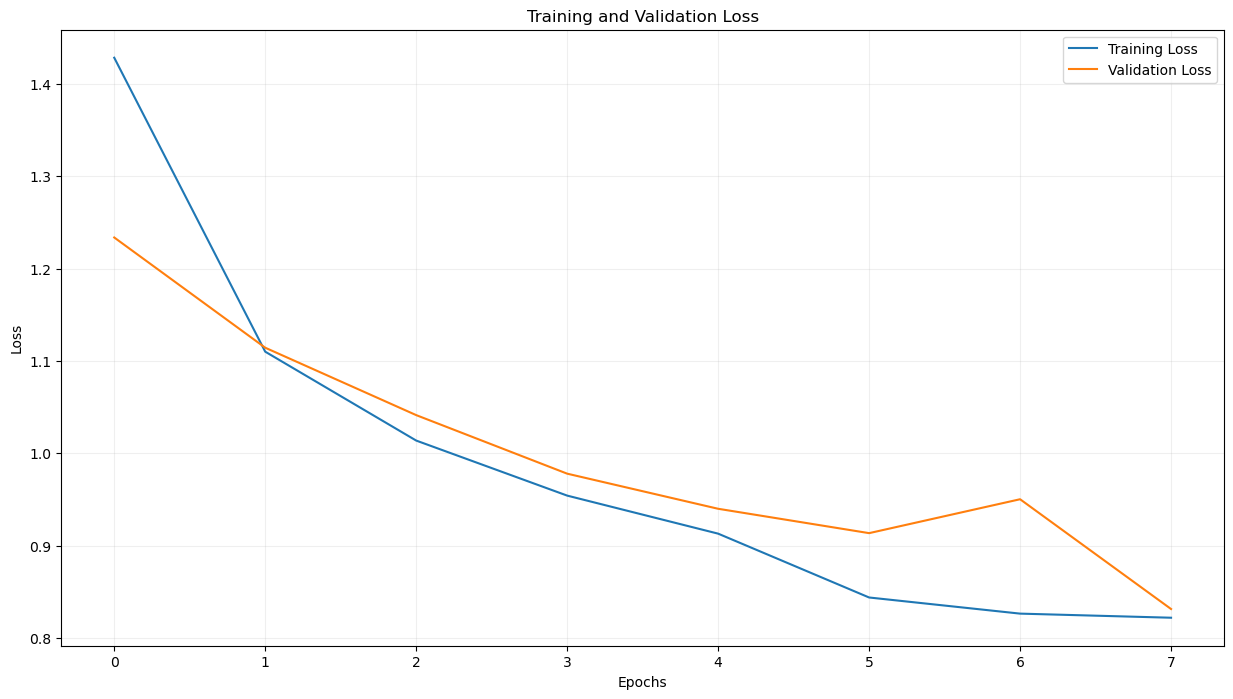

In [ ]:
# Access the training and validation loss from the 'history' object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plotting the training and validation loss
plt.figure(figsize=(15, 8))
plt.plot(training_loss, label='Training Loss')  # Plotting training loss
plt.plot(validation_loss, label='Validation Loss')  # Plotting validation loss
plt.xlabel('Epochs')  # Label for x-axis
plt.ylabel('Loss')  # Label for y-axis
plt.title('Training and Validation Loss')  # Title of the plot
plt.grid(alpha=0.2)  # Adding grid with transparency
plt.legend()  # Adding legend to the plot
plt.show()  # Display the plot

**Defining flower_model2 with some extra number of layers and early stopping for image classification**

In [ ]:
# Define the CNN model architecture
flower_model2 = Sequential()

# Convolutional layers with max pooling

# Add convolutional layers with max pooling
flower_model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))  # 32 filters, 3x3 kernel size
flower_model2.add(MaxPooling2D((2, 2)))  # Max pooling with a 2x2 pool size

flower_model2.add(Conv2D(64, (3, 3), activation='relu'))  # filters to 64, 3x3 kernel size
flower_model2.add(Conv2D(90, (3, 3), activation='relu'))  # Add another conv layer with 90 filters, 3x3 kernel size
flower_model2.add(MaxPooling2D((2, 2)))  # Max pooling with a 2x2 pool size

flower_model2.add(Conv2D(128, (3, 3), activation='relu'))  # Add 128 filters, 3x3 kernel size
flower_model2.add(MaxPooling2D((2, 2)))  # Max pooling with a 2x2 pool size

# Flattening and dense layers
flower_model2.add(Flatten())

# Add dense layers for classification with dropout for regularization
flower_model2.add(Dense(128, activation='relu'))  # Dense layer with 128 nodes
flower_model2.add(Dense(256, activation='relu'))  # Additional dense layer with 256 nodes

# Output layer
flower_model2.add(Dense(5, activation='softmax'))  # Output layer with 5 classes and softmax activation

# Compile the model
flower_model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print model summary
flower_model2.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 70, 70, 90)        51930     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 35, 35, 90)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 33, 33, 128)      

**Training our model**

In [ ]:
# Train the model on the training data
history = flower_model2.fit(
    # Provide the training data generator
    train_data_generator,
    # Specify the number of epochs (iterations over the entire dataset)
    epochs=8,
    # Use the validation generator for evaluation during training
    validation_data=validation_data_generator,
    # Callbacks for monitoring and customization
    callbacks=[
        # Early stopping to prevent overfitting
        EarlyStopping(patience=4)  # Stop if validation loss doesn't improve for 4 epochs
    ],
    # Verbosity mode: 1 for progress bar
    verbose=1
)


Epoch 1/8
92/92 [==============================] - 67s 716ms/step - loss: 1.3661 - accuracy: 0.3944 - val_loss: 1.2610 - val_accuracy: 0.4569
Epoch 2/8
92/92 [==============================] - 65s 711ms/step - loss: 1.1673 - accuracy: 0.5247 - val_loss: 1.1516 - val_accuracy: 0.5431
Epoch 3/8
92/92 [==============================] - 66s 715ms/step - loss: 1.0299 - accuracy: 0.5876 - val_loss: 1.0296 - val_accuracy: 0.5841
Epoch 4/8
92/92 [==============================] - 66s 717ms/step - loss: 0.9702 - accuracy: 0.6169 - val_loss: 0.9761 - val_accuracy: 0.6101
Epoch 5/8
92/92 [==============================] - 66s 714ms/step - loss: 0.8951 - accuracy: 0.6638 - val_loss: 0.9786 - val_accuracy: 0.6347
Epoch 6/8
92/92 [==============================] - 65s 708ms/step - loss: 0.8449 - accuracy: 0.6614 - val_loss: 0.9183 - val_accuracy: 0.6457
Epoch 7/8
92/92 [==============================] - 65s 708ms/step - loss: 0.8218 - accuracy: 0.6842 - val_loss: 0.9492 - val_accuracy: 0.6183
Epoch 

**Visualizing the performance of our model 2.**

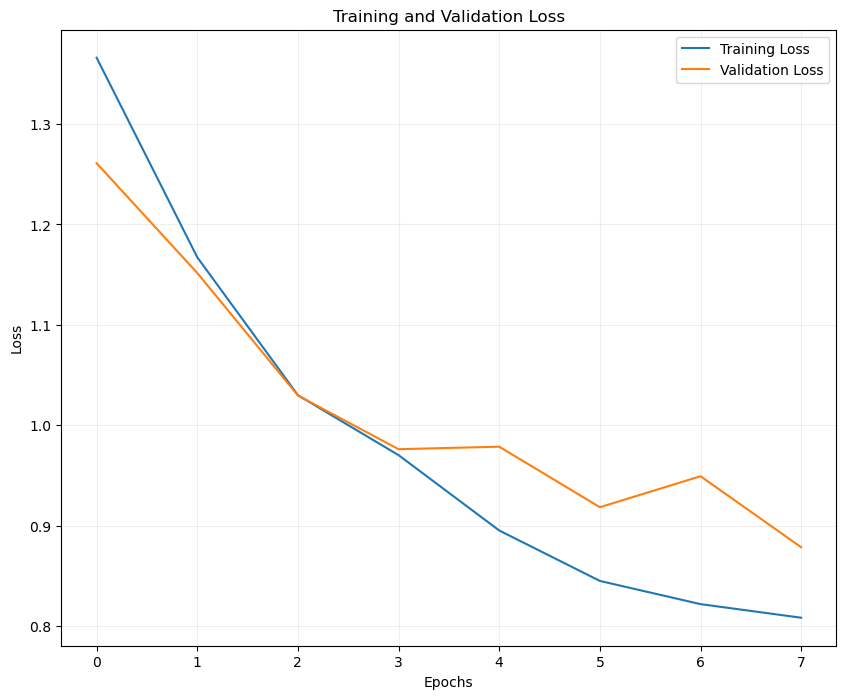

In [ ]:
# Access the training and validation loss from the 'history' object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plotting the training and validation loss
plt.figure(figsize=(10, 8))
plt.plot(training_loss, label='Training Loss')  # Plotting training loss
plt.plot(validation_loss, label='Validation Loss')  # Plotting validation loss
plt.xlabel('Epochs')  # Label for x-axis
plt.ylabel('Loss')  # Label for y-axis
plt.title('Training and Validation Loss')  # Title of the plot
plt.grid(alpha=0.2)  # Adding grid with transparency
plt.legend()  # Adding legend to the plot
plt.show()  # Display the plot

**Defining flower_model3 with some extra number of layers, early stopping and also adding dropout layer and custom learining rate for image classification**

In [ ]:

# Define the CNN model architecture
flower_model3 = Sequential()

# Convolutional layers with max pooling

# Add convolutional layers with max pooling
flower_model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))  # 32 filters, 3x3 kernel size
flower_model3.add(MaxPooling2D((2, 2)))  # Max pooling with a 2x2 pool size

flower_model3.add(Conv2D(64, (3, 3), activation='relu'))  # filters to 64, 3x3 kernel size
flower_model3.add(Conv2D(90, (3, 3), activation='relu'))  # Add another conv layer with 90 filters, 3x3 kernel size
flower_model3.add(MaxPooling2D((2, 2)))  # Max pooling with a 2x2 pool size

flower_model3.add(Conv2D(128, (3, 3), activation='relu'))  # Add 128 filters, 3x3 kernel size
flower_model3.add(MaxPooling2D((2, 2)))  # Max pooling with a 2x2 pool size

# Flattening and dense layers
flower_model3.add(Flatten())

# Add dense layers for classification with dropout for regularization
flower_model3.add(Dense(128, activation='relu'))  # Dense layer with 128 nodes
flower_model3.add(Dense(128, activation='relu'))  # Additional dense layer with 128 nodes
# Dropout Layer
flower_model3.add(Dropout(0.4))
flower_model3.add(Dense(128, activation='relu'))  # Additional dense layer with 128 nodes
flower_model3.add(Dense(128, activation='relu'))  # Additional dense layer with 128 nodes

# Output layer
flower_model3.add(Dense(5, activation='softmax'))  # Output layer with 5 classes and softmax activation

# Compile the model
flower_model3.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.00001), # --- Setting our own learning rate ---
              metrics=['accuracy'])

# Print model summary
flower_model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 70, 70, 90)        51930     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 35, 35, 90)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 33, 33, 128)      

**Visualizing the performance of our model 3.**

In [ ]:
# Train the model on the training data
history = flower_model3.fit(
    # Provide the training data generator
    train_data_generator,
    # Specify the number of epochs (iterations over the entire dataset)
    epochs=11,
    # Use the validation generator for evaluation during training
    validation_data=validation_data_generator,
    # Callbacks for monitoring and customization
    callbacks=[
        # Early stopping to prevent overfitting
        EarlyStopping(patience=3)  # Stop if validation loss doesn't improve for 3 epochs
    ],
    # Verbosity mode: 1 for progress bar
    verbose=1
)


Epoch 1/11
92/92 [==============================] - 66s 711ms/step - loss: 1.4717 - accuracy: 0.3249 - val_loss: 1.2757 - val_accuracy: 0.3748
Epoch 2/11
92/92 [==============================] - 65s 708ms/step - loss: 1.2147 - accuracy: 0.4655 - val_loss: 1.2251 - val_accuracy: 0.4966
Epoch 3/11
92/92 [==============================] - 65s 708ms/step - loss: 1.1214 - accuracy: 0.5267 - val_loss: 1.0853 - val_accuracy: 0.5390
Epoch 4/11
92/92 [==============================] - 65s 711ms/step - loss: 1.0516 - accuracy: 0.5747 - val_loss: 1.0373 - val_accuracy: 0.5663
Epoch 5/11
92/92 [==============================] - 65s 706ms/step - loss: 0.9616 - accuracy: 0.6111 - val_loss: 1.0332 - val_accuracy: 0.5814
Epoch 6/11
92/92 [==============================] - 67s 724ms/step - loss: 0.9312 - accuracy: 0.6448 - val_loss: 0.9258 - val_accuracy: 0.6402
Epoch 7/11
92/92 [==============================] - 73s 791ms/step - loss: 0.9008 - accuracy: 0.6512 - val_loss: 0.9278 - val_accuracy: 0.6389

**Visualizing the performance of our model 3.**

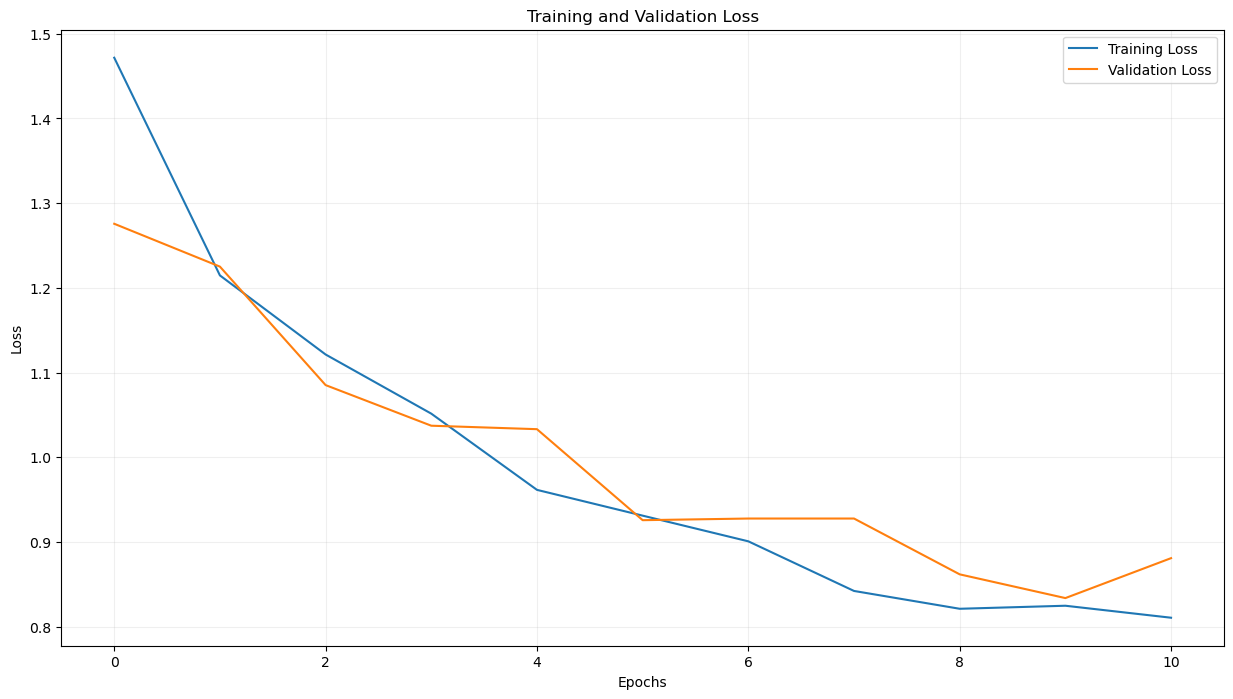

In [ ]:
# Access the training and validation loss from the 'history' object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plotting the training and validation loss
plt.figure(figsize=(15, 8))
plt.plot(training_loss, label='Training Loss')  # Plotting training loss
plt.plot(validation_loss, label='Validation Loss')  # Plotting validation loss
plt.xlabel('Epochs')  # Label for x-axis
plt.ylabel('Loss')  # Label for y-axis
plt.title('Training and Validation Loss')  # Title of the plot
plt.grid(alpha=0.2)  # Adding grid with transparency
plt.legend()  # Adding legend to the plot
plt.show()  # Display the plot

In [ ]:
# Saving the model the Best model "flower_model1".
flower_model1.save('flower_classification_model.h5')

C:\Users\Sukh-e\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
